<a href="https://colab.research.google.com/github/Ananya9703/ML-MINI-PROJECT/blob/main/Credit_risk_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CREDIT RISK CLASSIFICATION**

Credit risk is the risk of loss that arises from a borrower's failure to repay a loan or meet other contractual obligations. It is the possibility of a borrower defaulting on their financial obligations, such as paying back a loan or making interest payments.

Credit risk is a significant concern for lenders and financial institutions because the failure of a borrower to repay a loan can result in a significant financial loss. To manage credit risk, lenders typically assess the creditworthiness of borrowers before granting them a loan. This involves analyzing the borrower's credit history, income, and other financial information to determine the likelihood of repayment.

We have used a logistic regression model to predict the likelihood of a borrower defaulting on a loan, based on historical data and other factors. We have used an original dataset and a resampled dataset and evaluated the model’s performance for both to see which dataset classifies better.
For easier understanding, we have created pie charts to visualize the healthy and risky loans.


In [ ]:
#File Uploading on colab
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
# Reading the data
credit_risk= pd.read_csv("lending_data.csv")
credit_risk.head()
print(type(credit_risk))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#Creating Independent features and dependent features

# Independnet features
X = credit_risk.drop(['loan_status'], axis=1)
print(type(X))
# Dependent feature
y = credit_risk['loan_status']


<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Review the y variable Series
display(y.head())
display(y.tail())

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, dtype: int64

In [ ]:
# Review the x variable Series
display(X.head())
display(X.tail())

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300
77535,15600.0,9.742,72300,0.585062,9,2,42300


In [ ]:

print(y.value_counts())
print("\nTotal number of rows in dataset",credit_risk.shape[0])

0    75036
1     2500
Name: loan_status, dtype: int64

Total number of rows in dataset 77536


In [ ]:
#Split the data into training and testing datasets by using train_test_split.
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 1
)
#default value of train 75% and test is 25%

In [ ]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
LR_model = LogisticRegression(random_state = 1)

# Fit the model using training data
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
# Make a prediction using the testing data
import pandas as pd

LR_predictions = LR_model.predict(X_test)


In [ ]:
'''Evaluate the model’s performance by doing the following:
1.Calculate the accuracy score of the model.
2.Generate a confusion matrix.
3.Print the classification report.'''

# Print the balanced_accuracy score of the model
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, LR_predictions)

0.9520479254722232

In [ ]:
print("Original Values :")
print(y_test.value_counts())
print("\nPredicted Values :")
print(pd.Series(LR_predictions).value_counts())

Original Values :
0    18765
1      619
Name: loan_status, dtype: int64

Predicted Values :
0    18719
1      665
dtype: int64


In [ ]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
'''
From Confusion Matrix :

-- Out of the 18,765 loan status's that are healthy, the model predicted 18,719 as
   healthy correctly and 46 as healthy incorrectly

-- Out of the 619 loan status's that are non-healthy (high-risk), the model
   predicted 665 as non-healthy correctly and 56 as non-healthy incorrectly
'''

cm_imbalanced = confusion_matrix(y_test, LR_predictions)
cm_imbalanced_df = pd.DataFrame(cm_imbalanced,
                                index = ['Actual Healthy Loans (low-risk)',
                                'Actual Non-Healthy Loans (high-risk)'],
                                columns = ['Predicted Healthy Loans (low-risk)', 'Predicted Non-Healthy Loans (high-risk)']
                              )
cm_imbalanced_df

,Predicted Healthy Loans (low-risk),Predicted Non-Healthy Loans (high-risk)
Actual Healthy Loans (low-risk),18663,102
Actual Non-Healthy Loans (high-risk),56,563


In [ ]:
# Print the classification report for the model
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



****To improve the accuracy of the model we will use RandomOverSampler from imbalanced learn library to generate new samples by randomly sampling with replacement the current available samples.***



In [ ]:
#Predict a Logistic Regression Model with Resampled Training Data

#Use the RandomOverSampler module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points.
#Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ROS_model = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
X_oversampled, y_oversampled = ROS_model.fit_resample(X_train, y_train)

In [ ]:
# Count the distinct values of the resampled labels data
y_oversampled.value_counts()

0    56271
1    56271
Name: loan_status, dtype: int64

In [ ]:
# Instantiate the Logistic Regression model with random oversampling
# Assign a random_state parameter of 1 to the model
LR_oversampled_model = LogisticRegression(random_state = 1)

# Fit the model using the resampled training data
LR_oversampled_model.fit(X_oversampled, y_oversampled)

# Make a prediction using the testing data
LR_oversampled_pred = LR_oversampled_model.predict(X_test)

In [ ]:
# Print the balanced_accuracy score of the model

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, LR_oversampled_pred)

0.9936781215845847

In [ ]:
# Generate a confusion matrix for the model
'''
-- Out of the 18,765 loan status's that are healthy, the model predicted 18,649 as
   healthy correctly and 116 as healthy incorrectly

-- Out of the 619 loan status's that are non-healthy (high-risk), the model
   predicted 615 as non-healthy correctly and 4 as non-healthy incorrectly
'''

cm_oversampled = confusion_matrix(y_test, LR_oversampled_pred)
cm_oversampled_df = pd.DataFrame(cm_oversampled,
                                index = ['Actual Healthy Loans (low-risk)',
                                'Actual Non-Healthy Loans (high-risk)'],
                                columns = ['Predicted Healthy Loans (low-risk)', 'Predicted Non-Healthy Loans (high-risk)']
                              )
cm_oversampled_df

,Predicted Healthy Loans (low-risk),Predicted Non-Healthy Loans (high-risk)
Actual Healthy Loans (low-risk),18649,116
Actual Non-Healthy Loans (high-risk),4,615


In [ ]:
# Print the classification report for the model
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_oversampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



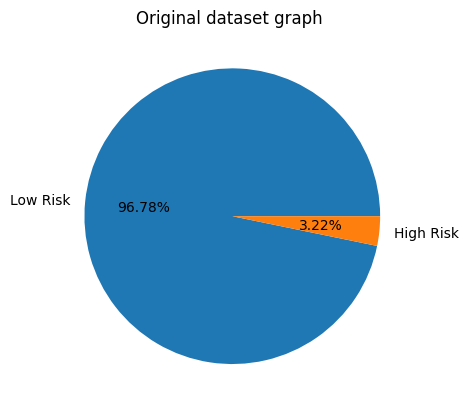

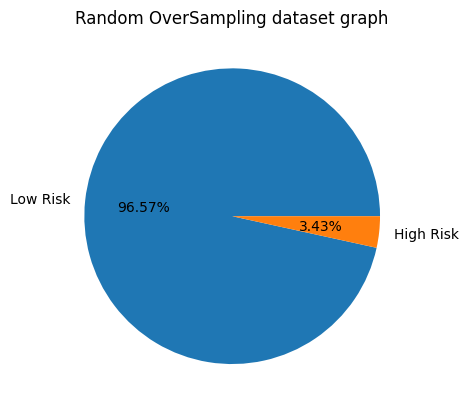

In [ ]:
#Data visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#for original data set plotting the pie chart
arr=[y.value_counts()[0],y.value_counts()[1]]
l=["Low Risk","High Risk"]
plt.pie(arr,labels=l, autopct="%1.2f%%")
plt.title('Original dataset graph ')
plt.show()

arr=[pd.Series(LR_predictions).value_counts()[0],pd.Series(LR_predictions).value_counts()[1]]
plt.pie(arr,labels=l,autopct="%1.2f%%")
plt.title('Random OverSampling dataset graph')
plt.show()

In [ ]:
import pandas as pd

l_s=int(input("Enter loan size:"))
loan_size="{:.1f}".format(l_s)

i_r=float(input("Enter Interest rate:"))
inter_rate="{:.3f}".format(i_r)

borrower_income=int(input("Enter Borrower income:"))

d_t_i=float(input("Enter Debt to income:"))
debt_to_income="{:.6f}".format(d_t_i)

num_of_accounts=int(input("Enter No. of accounts:"))
derogatory_marks=int(input("Enter Derogatory marks:"))
total_debt=int(input("Enter Total debt:"))

new_x=pd.DataFrame({'loan_size':[loan_size],'interest_rate':[inter_rate],'borrower_income':[borrower_income],'debt_to_income':[debt_to_income],'num_of_accounts':[num_of_accounts],'derogatory_marks':[derogatory_marks],'total_debt':[total_debt]})
print("Type of following data:",type(new_x))
print("\n",new_x)

new_pred = LR_oversampled_model.predict(new_x)
print("\n")
new_loan_status=""

if(new_pred==1):
  new_loan_status="High risk"

else:
  new_loan_status="Low Risk"

print("Loan Status of given data:",new_loan_status)

Enter loan size:54000
Enter Interest rate:4.2
Enter Borrower income:56000
Enter Debt to income:2.3
Enter No. of accounts:4
Enter Derogatory marks:3
Enter Total debt:57000
Type of following data: <class 'pandas.core.frame.DataFrame'>

   loan_size interest_rate  borrower_income debt_to_income  num_of_accounts  \
0   54000.0         4.200            56000       2.300000                4   

   derogatory_marks  total_debt  
0                 3       57000  


Loan Status of given data: High risk
